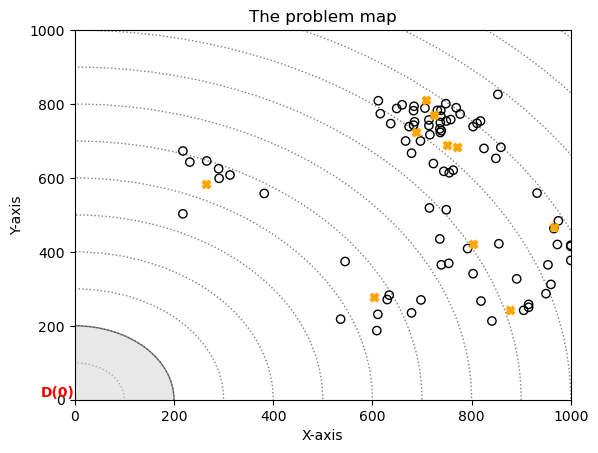

In [42]:
%run Model.ipynb

In [43]:
problem = make_problem(n_nodes_per_cluster=3,n_chargers=2)
inital = initial_solution(problem,n_trips=2)
operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert]
probabilities = [1/3,1/3,1/3]
#show_the_map(problem)

Jobs Information:
Turbine ID      Crew Needed    
3               4              
4               1              
5               1              
6               1              
7               4              
8               5              
Vessel Types Information:
Vessel ID  Battery Range   Operational Cost     Speed (Knots)             Passenger Capacity   Fixed Cost          
1          2000            1                    20                        10                   5000                
2          3000            2                    22                        15                   10000               
3          4500            3.5                  25                        25                   17000               
Initial Solution:           [(0, 0), (0, 0), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1)]


In [44]:
#sol,cost,n_feasible,cost_movement = simple_sim_annealing(inital,problem,operators,probabilities)

In [45]:
best_solution,processed_best,best_cost,best_costs,costs,all_weights,all_scores,all_used,final_improvement,unique = ALNS(inital,problem,operators)

New best cost at 1 with cost 43793.9
New best cost at 2 with cost 39265.270000000004
New best cost at 3 with cost 29049.050000000003
New best cost at 6 with cost 28741.16
New best cost at 11 with cost 24057.12
New best cost at 13 with cost 19038.7
New best cost at 14 with cost 18725.61
New best cost at 17 with cost 18238.77
New best cost at 32 with cost 15922.08
New best cost at 45 with cost 15885.690000000002
New best cost at 47 with cost 15870.420000000002
New best cost at 72 with cost 15766.21
New best cost at 133 with cost 15485.970000000001
New best cost at 176 with cost 15408.55
New best cost at 218 with cost 15242.289999999999
New best cost at 403 with cost 15219.5
New best cost at 617 with cost 15140.6
New best cost at 921 with cost 15043.37
New best cost at 1057 with cost 14916.68
Escape at 1808
Cost Before Escape: 16002.01
Escape at 2560
Cost Before Escape: 15963.77
Escape at 3312
Cost Before Escape: 15357.029999999999
Escape at 4064
Cost Before Escape: 15804.49
New best cost

In [32]:
#mulit_best_sol,multi_best_cost,multi_best_costs,multi_cost_lists,multi_improvement_lists = multiple_ALNS_runs(small_inital,small_problem,operators,10)
#average_costs = [sum(values)/len(values) for values in zip(*multi_cost_lists)]
#average_improvements = [sum(values)/len(values) for values in zip(*multi_improvement_lists)]

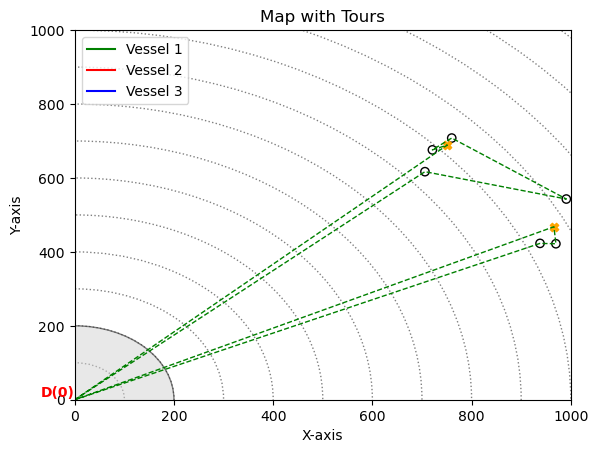

In [46]:
# Create the base map
ax = show_the_map(problem)

# Plot all trips on the map
ax = plot_all_trips(ax, processed_best, problem)

# Display the combined plot
plt.show()

[0, 5, 5, 6, 6, 3, 3, 4, 4, 1, 0]
[0, 7, 7, 8, 8, 2, 0]


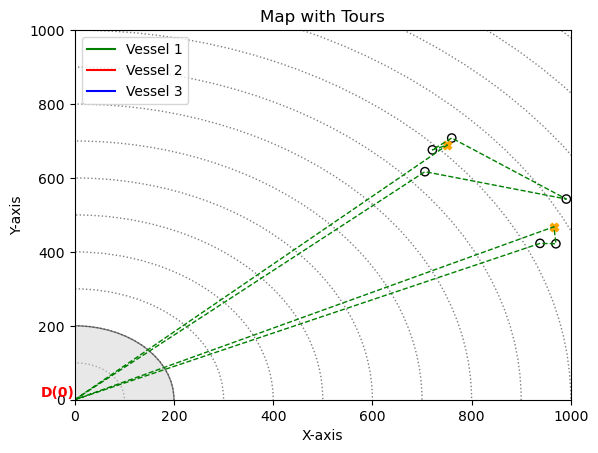

In [34]:
bx = show_the_map(problem)

bx = plot_some_trips(bx, processed_best, problem,2)

plt.show()

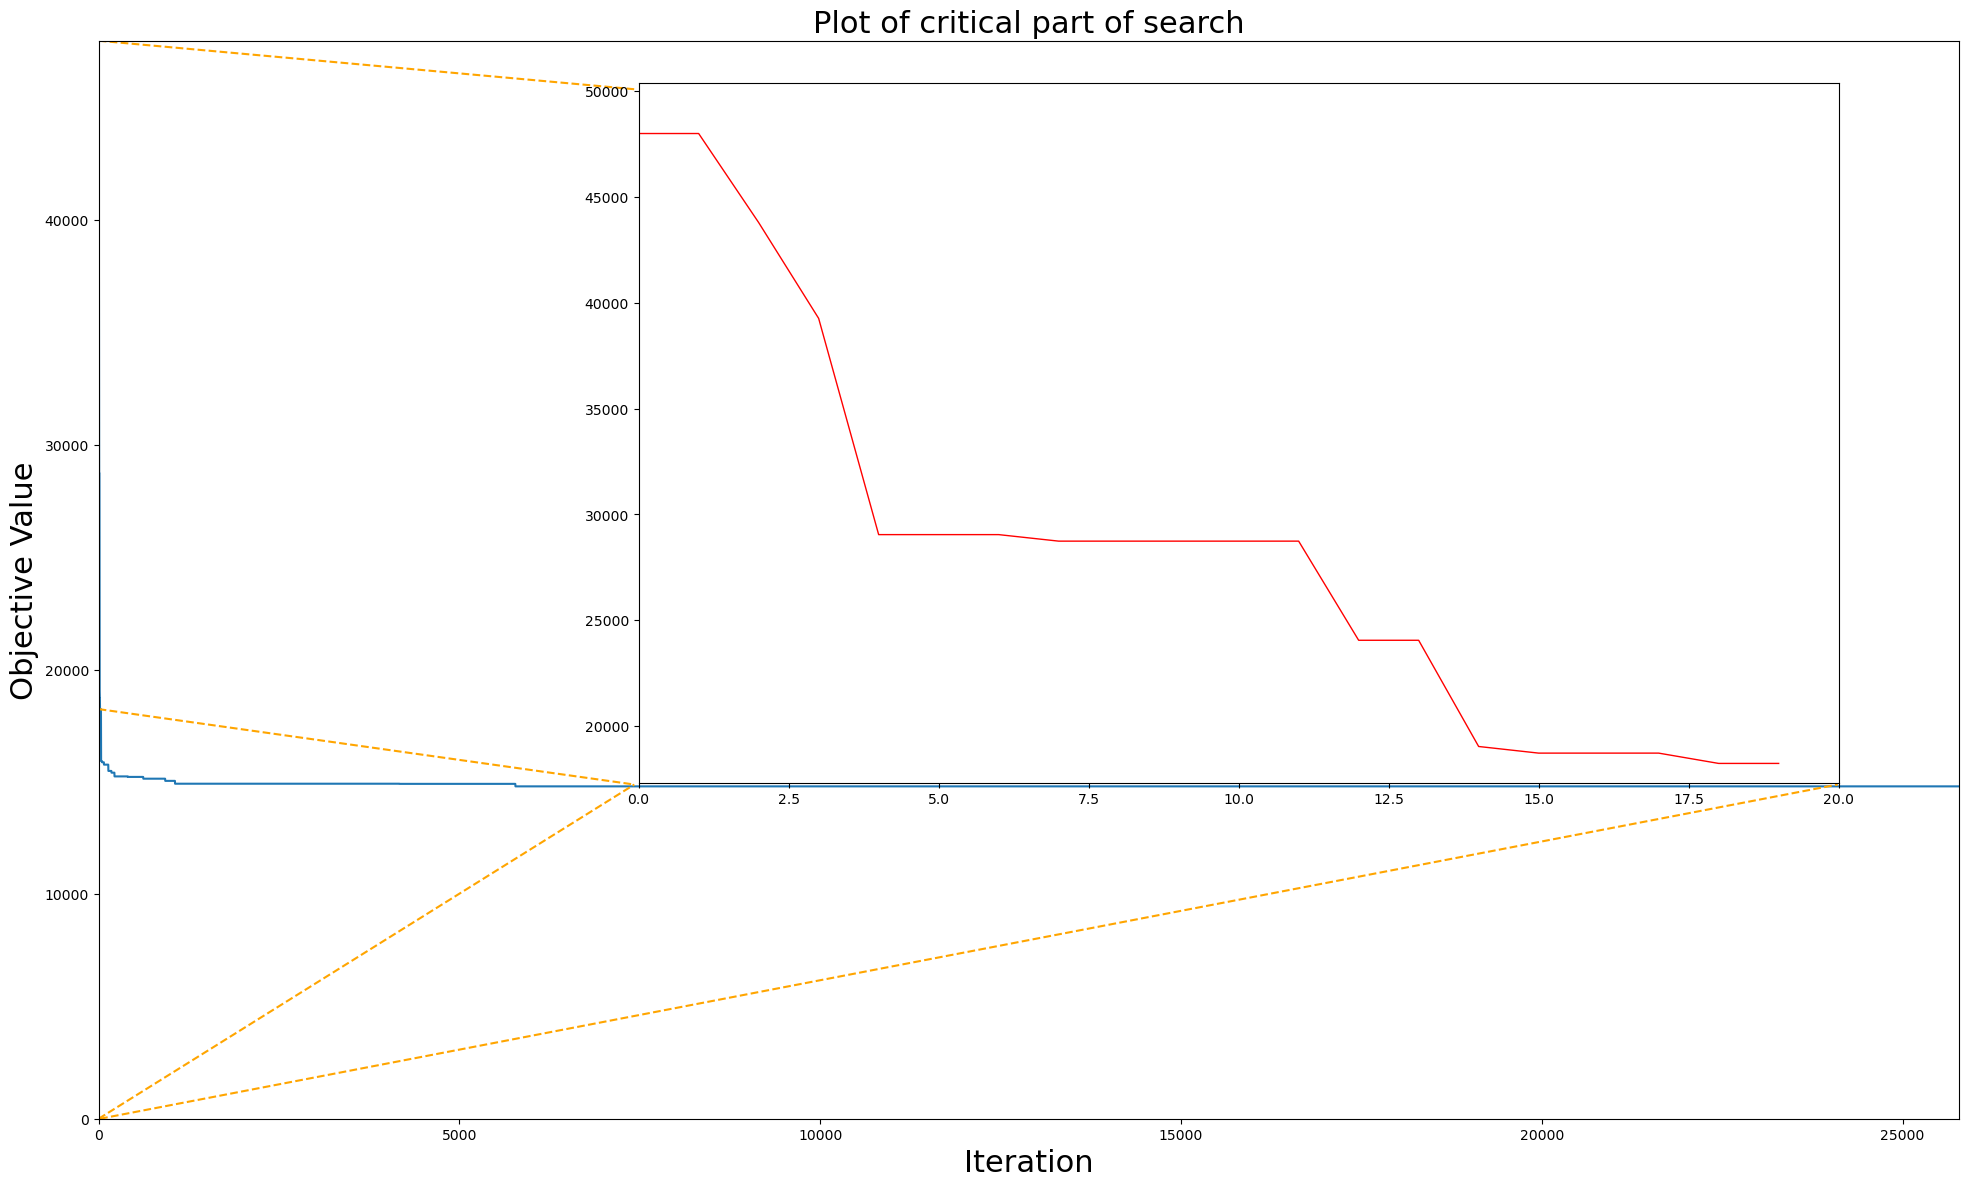

In [35]:
zoomed_plot(best_costs,0,20)

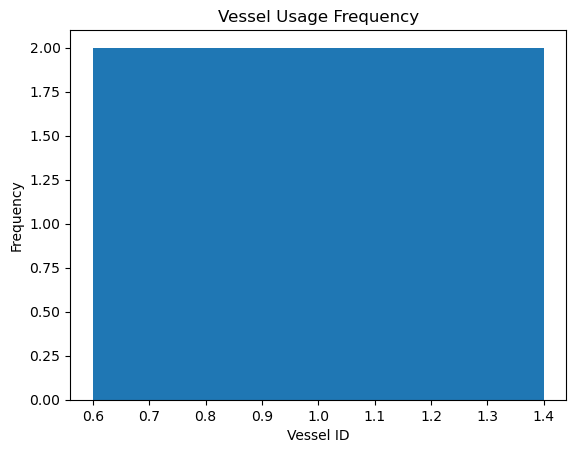

In [36]:
show_vessel_distribution(processed_best)

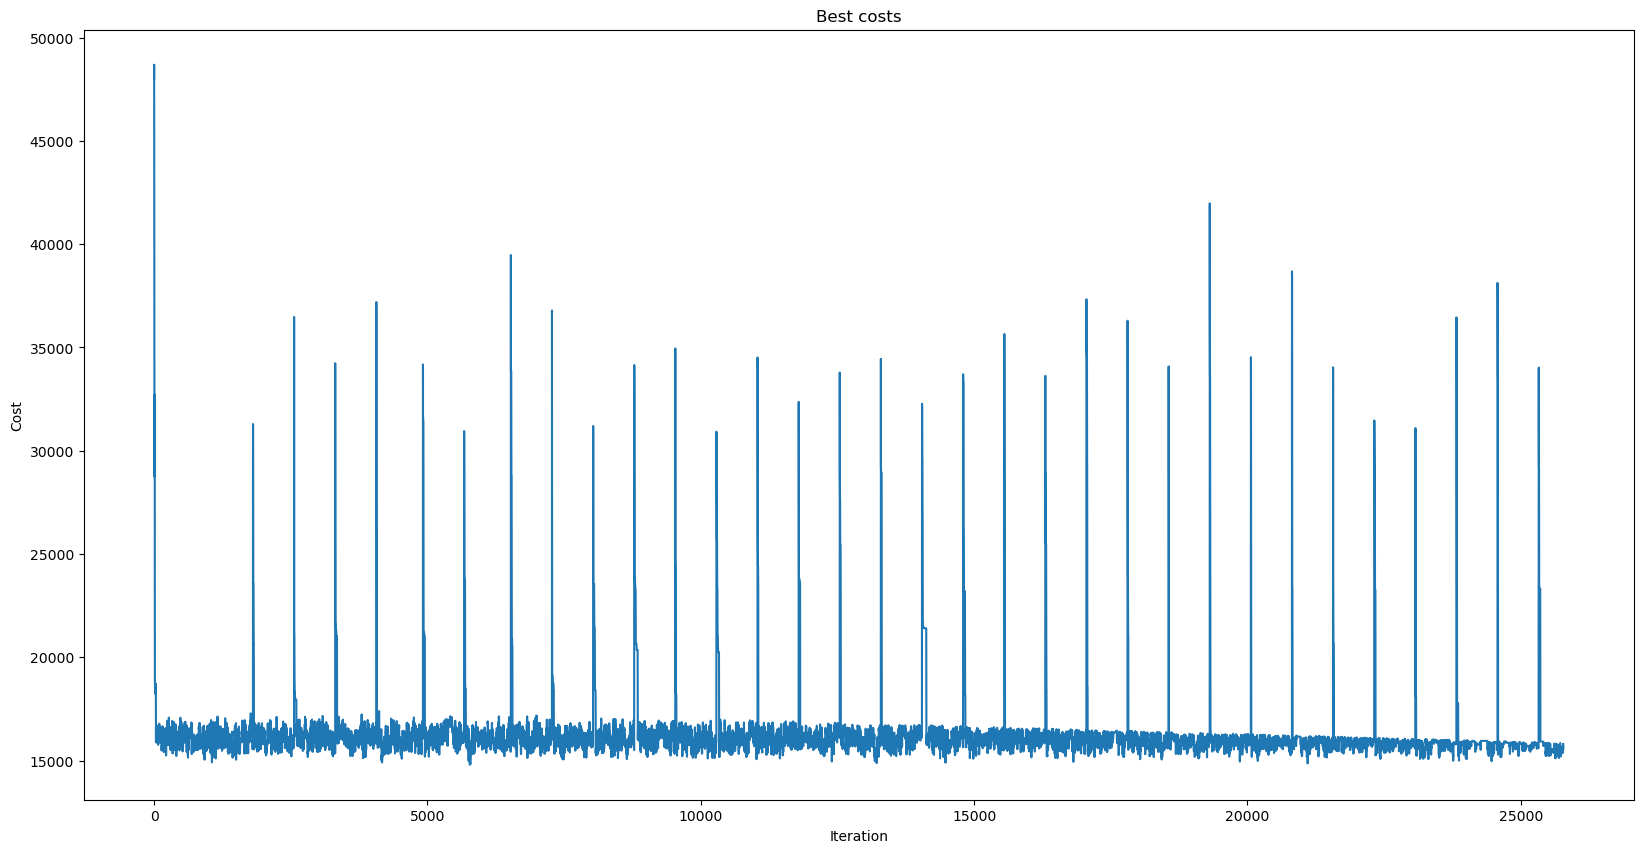

In [37]:
plot_costs(costs)

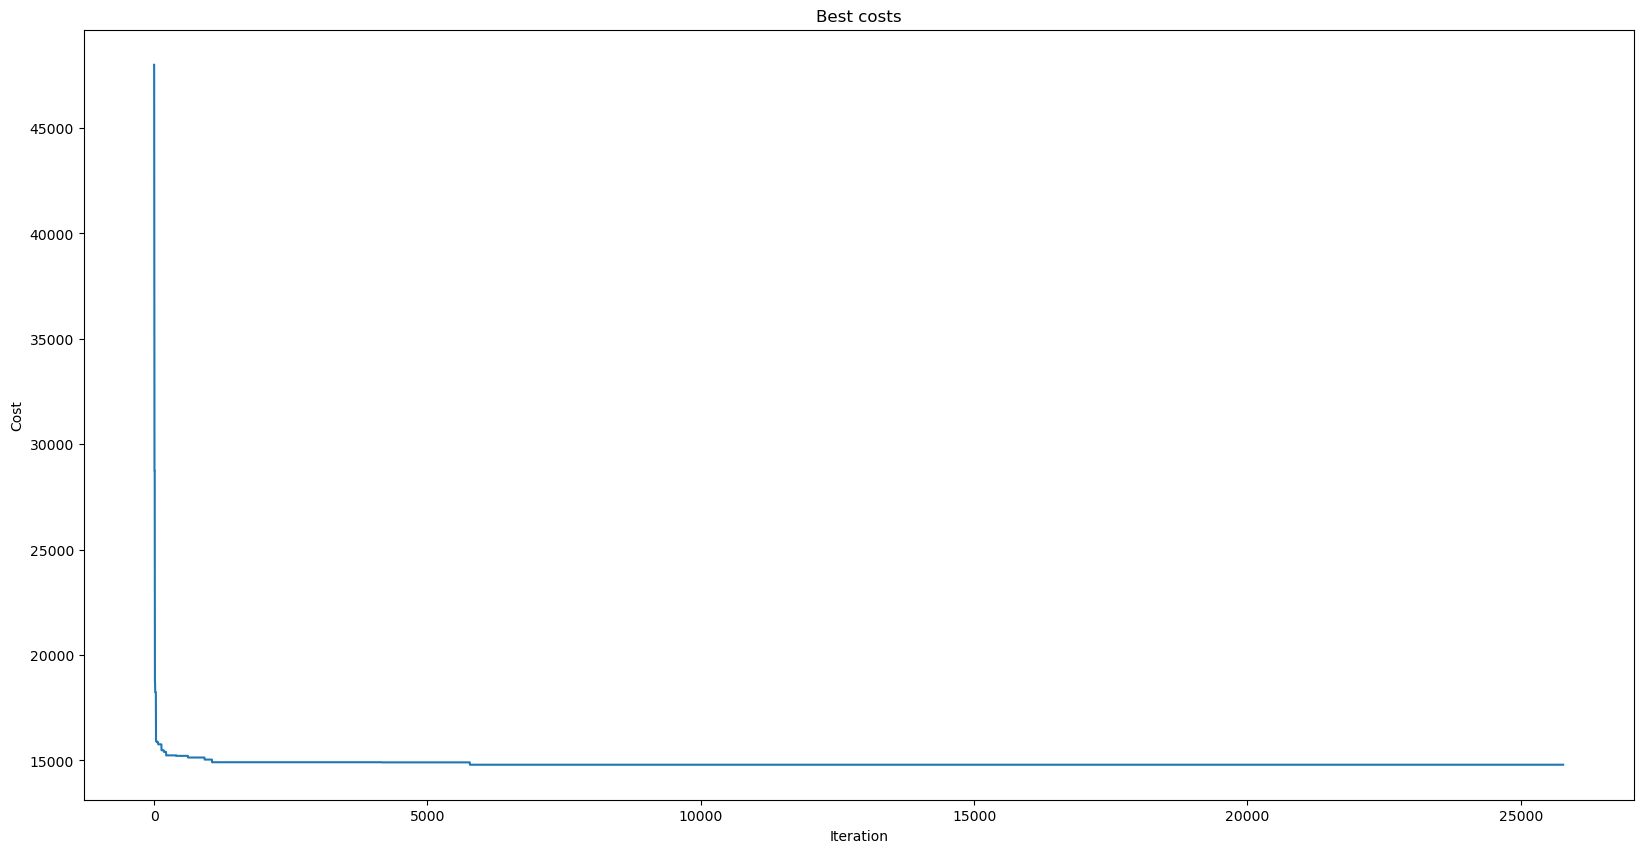

In [38]:
plot_costs(best_costs)

In [39]:
best_solution

[(7, 0),
 (7, 1),
 (8, 0),
 (8, 1),
 (0, 0),
 (5, 0),
 (5, 1),
 (6, 0),
 (6, 1),
 (3, 0),
 (3, 1),
 (4, 0),
 (4, 1),
 (0, 0)]

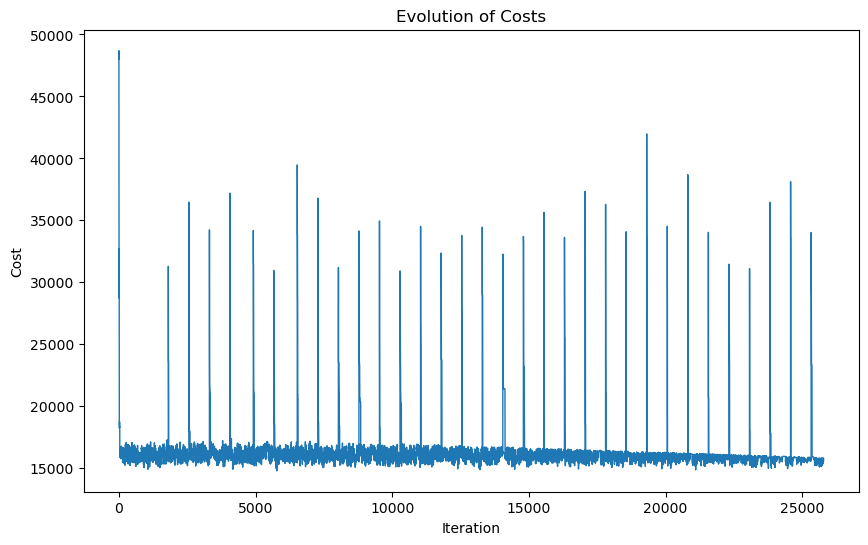

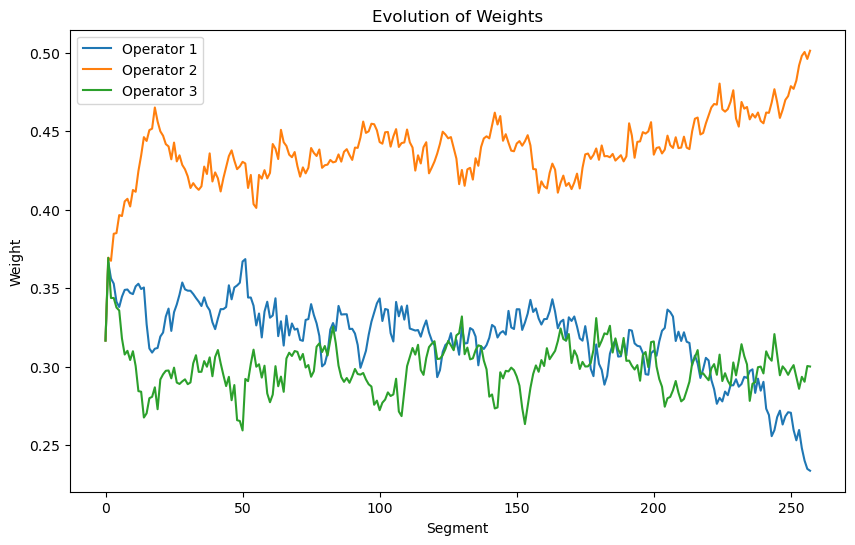

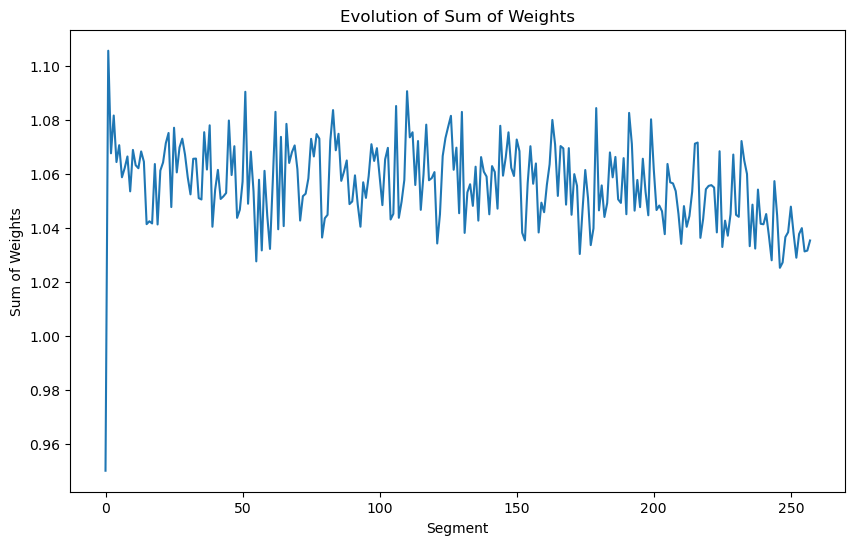

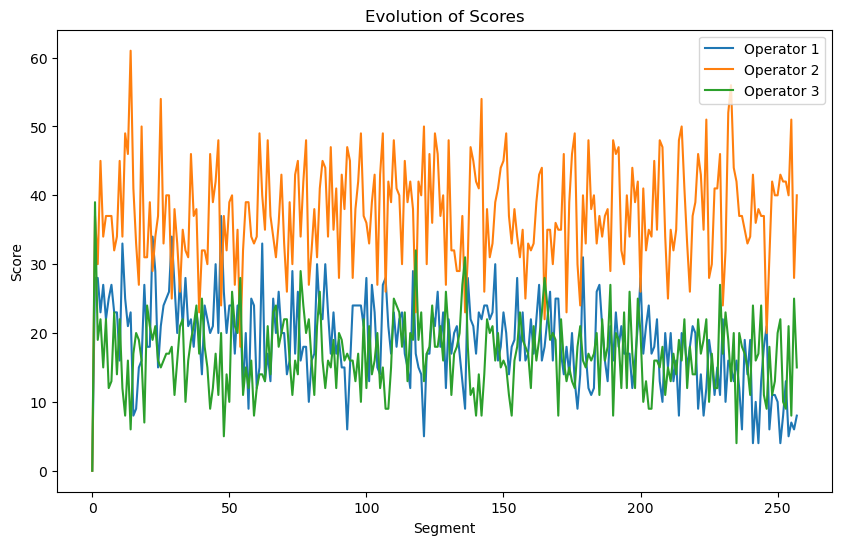

In [40]:
plot_output_lists(costs,all_weights,all_scores)

In [14]:
def multiple_ALNS_runs(initial, problem,operators,n_runs):
    best_solution = initial
    best_cost = objective_function(initial,problem)
    best_costs = []
    cost_lists = []
    improvement_lists = []
    
    for i in range(n_runs):
        print(f'Starting run {i+1}')
        solution,_,cost,improvement,costs,_,_,_,_,_ = ALNS(initial,problem,operators)
        cost_lists.append(costs)
        improvement_lists.append(improvement)
        if cost<best_cost:
            best_solution = solution
            best_cost = cost
            best_costs = costs
    
    
    return best_solution,best_cost,best_costs,cost_lists,improvement_lists

In [76]:
def ExperimentI(problem,trip_range):
    
    charge_lists = []
    n_vessels = []
    best_costs = []
    
    
    operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert]
    
    for i in trip_range:
        print(f'Starting iteration with {i} Vessels')
        inital = initial_solution(problem,n_trips=i)
        _,processed_best,best_cost,_,_,_,_,_,_,_ = ALNS(inital,problem,operators)
        charging = processed_best[2]
        charging_amount = sum(len(sublist) for sublist in charging)
        best_costs.append(best_cost)
        charge_lists.append(charging_amount)
        n_vessels.append(i)
        
    return n_vessels,charge_lists,best_costs

Jobs Information:
Turbine ID      Crew Needed    
8               6              
9               8              
10              8              
11              4              
12              3              
13              6              
14              5              
15              6              
16              5              
17              5              
18              5              
19              5              
20              8              
21              4              
22              3              
23              6              
24              1              
25              1              
26              8              
27              7              
28              5              
29              5              
30              8              
31              6              
32              6              
33              8              
34              2              
35              8              
36              1              
37              5     

<Axes: title={'center': 'The problem map'}, xlabel='X-axis', ylabel='Y-axis'>

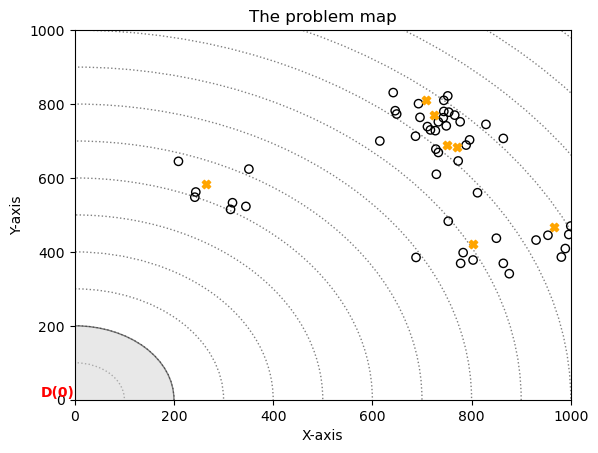

In [74]:
problem = make_problem(n_nodes_per_cluster=7,n_chargers=7)
show_the_map(problem)

In [75]:
ExperimentI(problem,range(15,20))

Starting iteration with 15 Vessels
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1), (21, 0), (21, 1), (22, 0), (22, 1), (23, 0), (23, 1), (24, 0), (24, 1), (25, 0), (25, 1), (26, 0), (26, 1), (27, 0), (27, 1), (28, 0), (28, 1), (29, 0), (29, 1), (30, 0), (30, 1), (31, 0), (31, 1), (32, 0), (32, 1), (33, 0), (33, 1), (34, 0), (34, 1), (35, 0), (35, 1), (36, 0), (36, 1), (37, 0), (37, 1), (38, 0), (38, 1), (39, 0), (39, 1), (40, 0), (40, 1), (41, 0), (41, 1), (42, 0), (42, 1), (43, 0), (43, 1), (44, 0), (44, 1), (45, 0), (45, 1), (46, 0), (46, 1), (47, 0), (47, 1), (48, 0), (48, 1), (49, 0), (49, 1), (50, 0), (50, 1), (51, 0), (51, 1), (52, 0), (52, 1), (53, 0), (

([6, 4, 4, 8, 14], [15, 16, 17, 18, 19])